# We will try a few machines, and see which is the best to use for hyperparamter tuning lets take a look 


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = r"/Users/sa8/Desktop/Titanic/csv_data/dfTrain_Clean.csv"
train_data = pd.read_csv(file_path)


df = train_data

In [53]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,21.5,1,2,23.4500,0,0
889,1,1,0,26.0,0,0,30.0000,1,1


In [54]:

# Features: All columns except "Survived"
X = df.drop(columns=["Survived"])  

# Target: "Survived" column
y = df["Survived"]  

#Split data into separate training test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
#lets look at number of samples and features for X_train & X_test using .shape
X_train.shape, X_test.shape

((712, 8), (179, 8))

In [56]:
X_train.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
HasCabin      int64
dtype: object

In [57]:
#Scale data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
# Random Forest Classifier

In [58]:
# Lets try a Random Forest Classifier 

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


#Lets train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
#Making predictions 
rf_y_pred = rf_model.predict(X_test)

#Checking the auccuracy
accuracyrf = accuracy_score(y_test, rf_y_pred)
accuracy_percentrf = accuracyrf * 100
print(f"Random Forest Accuracy: {accuracy_percentrf:.2f}%")

Random Forest Accuracy: 81.01%


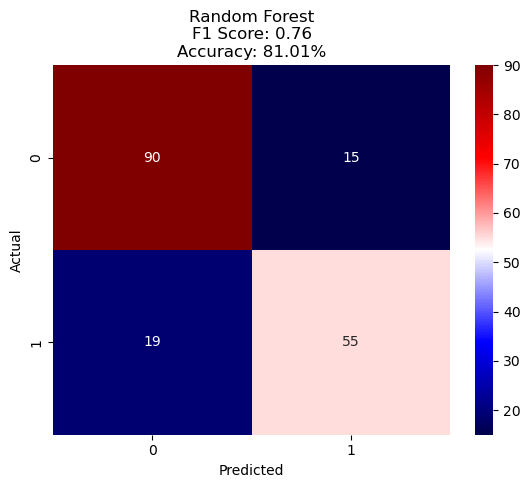

In [60]:
#Confusion Matrix for Random Forest Classifier 

rf_cm = confusion_matrix(y_test,rf_y_pred)
f1_rf = f1_score(y_test, rf_y_pred)
sns.heatmap(rf_cm,annot= True,fmt="d",cmap="seismic")
plt.title(f"Random Forest\nF1 Score: {f1_rf:.2f}\nAccuracy: {accuracy_percentrf:.2f}%")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Positive = 90
- True Negative = 55
- False Positive = 15
- False Negative = 19 


In [61]:
# Classification report for RFC
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



---
# Gradient Boosting Classifier

In [62]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [63]:
#Making predictions 
gb_y_pred = gb_model.predict(X_test)

#Checking the auccuracy
accuracygb = accuracy_score(y_test, gb_y_pred)
accuracy_percentgb = accuracygb * 100
print(f"Gradient Boosting Accuracy: {accuracy_percentgb:.4f}%")

Gradient Boosting Accuracy: 82.6816%


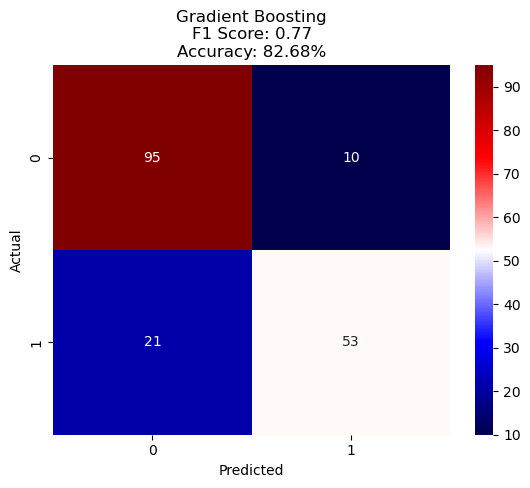

In [64]:
gb_cm = confusion_matrix(y_test,gb_y_pred)
f1_gb = f1_score(y_test, gb_y_pred)
sns.heatmap(gb_cm,annot= True,fmt="d",cmap="seismic")
plt.title(f"Gradient Boosting\nF1 Score: {f1_gb:.2f}\nAccuracy: {accuracy_percentgb:.2f}%")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Positive = 95
- True Negative = 53
- False Positive = 10
- False Negative = 21 


In [65]:
# Classification report for GBC
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



---
# Logistic Regression 

In [66]:
#LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [67]:
lr_y_pred = lr_model.predict(X_test)

In [68]:
accuracylr = accuracy_score(y_test, lr_y_pred)
accuracy_percentlr = accuracylr * 100
print(f"Gradient Boosting Accuracy: {accuracy_percentlr:.2f}%")

Gradient Boosting Accuracy: 82.12%


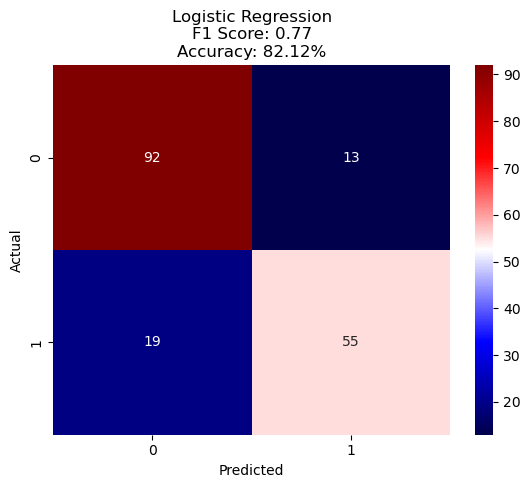

In [69]:
lr_cm = confusion_matrix(y_test,lr_y_pred)
f1_lr = f1_score(y_test, lr_y_pred)
sns.heatmap(lr_cm,annot= True,fmt="d",cmap="seismic")
plt.title(f"Logistic Regression\nF1 Score: {f1_lr:.2f}\nAccuracy: {accuracy_percentlr:.2f}%")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Positive = 92
- True Negative = 55
- False Positive = 13
- False Negative = 19 

In [70]:
# Classification report for LR
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



---
# Naive Bayes 

In [71]:

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [72]:
nb_y_pred = nb_model.predict(X_test)

In [73]:
accuracynb = accuracy_score(y_test, nb_y_pred)
accuracy_percentnb = accuracynb * 100
print(f"Naive Bayes: {accuracy_percentnb:.2f}%")

Naive Bayes: 78.21%


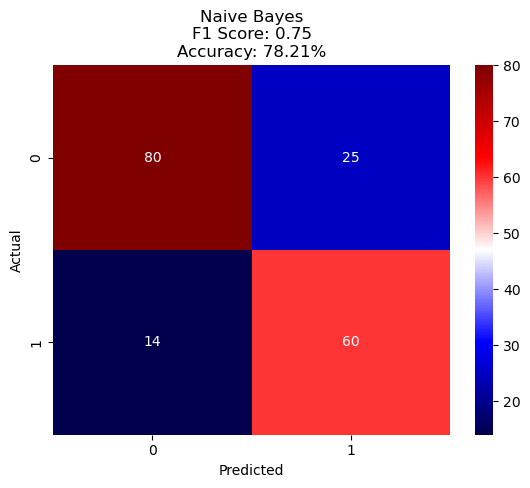

In [74]:
nb_cm = confusion_matrix(y_test,nb_y_pred)
f1_nb = f1_score(y_test, nb_y_pred)
sns.heatmap(nb_cm,annot= True,fmt="d",cmap="seismic")
plt.title(f"Naive Bayes\nF1 Score: {f1_nb:.2f}\nAccuracy: {accuracy_percentnb:.2f}%")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- True Positive = 80
- True Negative = 60
- False Positive = 25
- False Negative = 14

In [75]:
# Classification report for NB
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       105
           1       0.71      0.81      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.78      0.78       179



---
# Lets show the AUC for all the machines and see which is the best 

Logistic Regression AUC: 88.53%
Naive Bayes AUC: 85.73%
Gradient Boosting AUC: 88.29%
Random Forest AUC: 89.83%


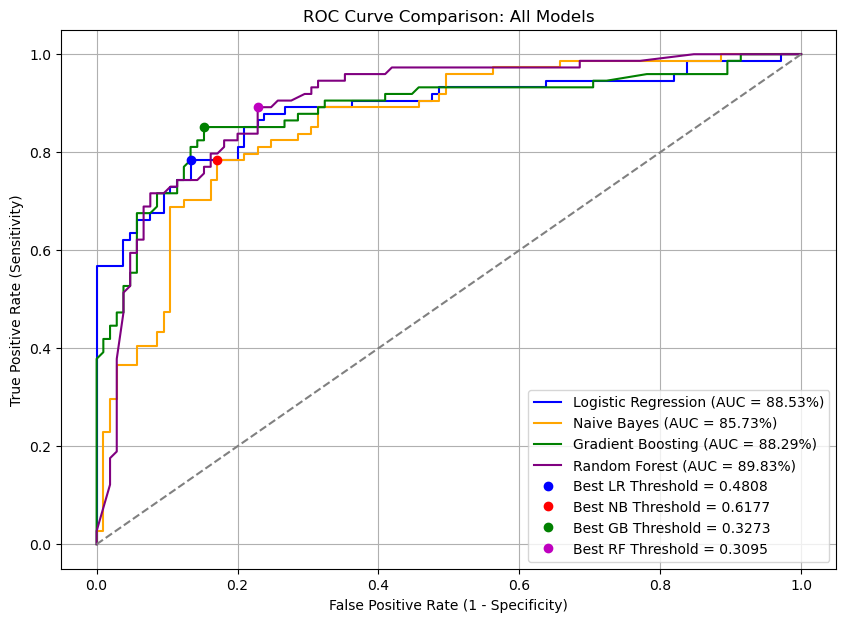

In [76]:
# Logistic Regression Probabilities
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

# ROC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
youden_j_lr = tpr_lr - fpr_lr
best_index_lr = youden_j_lr.argmax()
best_threshold_lr = thresholds_lr[best_index_lr]
best_fpr_lr = fpr_lr[best_index_lr]
best_tpr_lr = tpr_lr[best_index_lr]
roc_auc_lr = auc(fpr_lr, tpr_lr) * 100  # convert to percent

# Naive Bayes Probabilities
y_prob_nb = nb_model.predict_proba(X_test)[:,1]

# ROC for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
youden_j_nb = tpr_nb - fpr_nb
best_index_nb = youden_j_nb.argmax()
best_threshold_nb = thresholds_nb[best_index_nb]
best_fpr_nb = fpr_nb[best_index_nb]
best_tpr_nb = tpr_nb[best_index_nb]
roc_auc_nb = auc(fpr_nb, tpr_nb) * 100  # convert to percent

# Gradient Boosting Probabilities
y_prob_gb = gb_model.predict_proba(X_test)[:,1]

# ROC for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
youden_j_gb = tpr_gb - fpr_gb
best_index_gb = youden_j_gb.argmax()
best_threshold_gb = thresholds_gb[best_index_gb]
best_fpr_gb = fpr_gb[best_index_gb]
best_tpr_gb = tpr_gb[best_index_gb]
roc_auc_gb = auc(fpr_gb, tpr_gb) * 100  # convert to percent

# Random Forest Probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# ROC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
youden_j_rf = tpr_rf - fpr_rf
best_index_rf = youden_j_rf.argmax()
best_threshold_rf = thresholds_rf[best_index_rf]
best_fpr_rf = fpr_rf[best_index_rf]
best_tpr_rf = tpr_rf[best_index_rf]
roc_auc_rf = auc(fpr_rf, tpr_rf) * 100  # convert to percent

# Print AUCs in percent
print(f"Logistic Regression AUC: {roc_auc_lr:.2f}%")
print(f"Naive Bayes AUC: {roc_auc_nb:.2f}%")
print(f"Gradient Boosting AUC: {roc_auc_gb:.2f}%")
print(f"Random Forest AUC: {roc_auc_rf:.2f}%")

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f}%)", color="blue")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f}%)", color="orange")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f}%)", color="green")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f}%)", color="purple")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Best threshold markers
plt.plot(best_fpr_lr, best_tpr_lr, 'bo', label=f"Best LR Threshold = {best_threshold_lr:.4f}")
plt.plot(best_fpr_nb, best_tpr_nb, 'ro', label=f"Best NB Threshold = {best_threshold_nb:.4f}")
plt.plot(best_fpr_gb, best_tpr_gb, 'go', label=f"Best GB Threshold = {best_threshold_gb:.4f}")
plt.plot(best_fpr_rf, best_tpr_rf, 'mo', label=f"Best RF Threshold = {best_threshold_rf:.4f}")

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve Comparison: All Models")
plt.legend()
plt.grid()
plt.show()


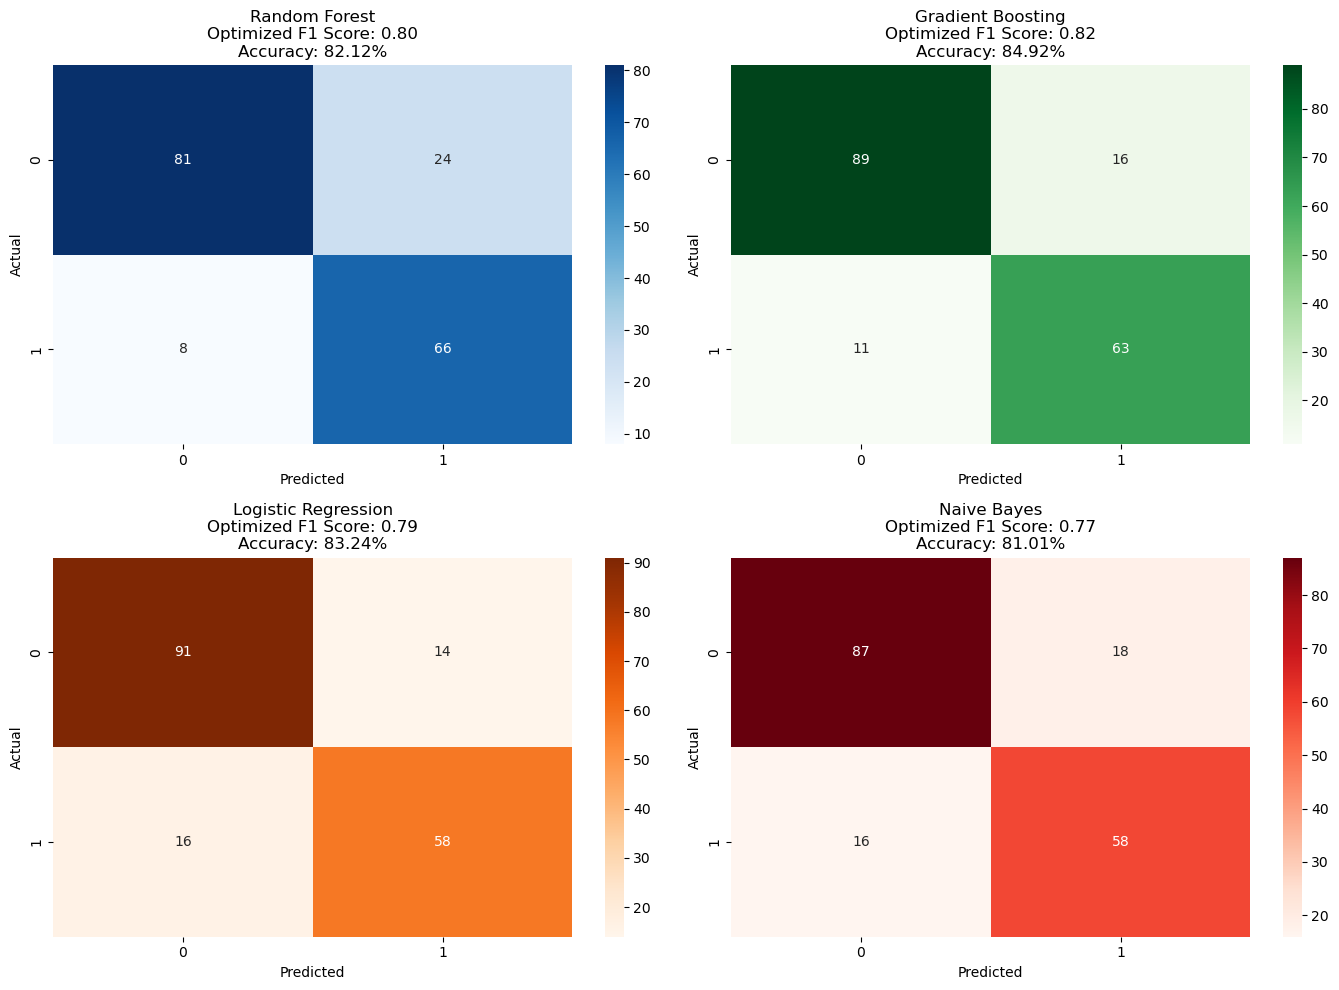

In [77]:


# Create thresholded predictions
y_pred_rf_thresh = (y_prob_rf >= best_threshold_rf).astype(int)
y_pred_gb_thresh = (y_prob_gb >= best_threshold_gb).astype(int)
y_pred_lr_thresh = (y_prob_lr >= best_threshold_lr).astype(int)
y_pred_nb_thresh = (y_prob_nb >= best_threshold_nb).astype(int)

# Generate confusion matrices with the best thresholds
cm_rf = confusion_matrix(y_test, y_pred_rf_thresh)
cm_gb = confusion_matrix(y_test, y_pred_gb_thresh)
cm_lr = confusion_matrix(y_test, y_pred_lr_thresh)
cm_nb = confusion_matrix(y_test, y_pred_nb_thresh)

# Compute F1 scores
optf1_rf = f1_score(y_test, y_pred_rf_thresh)
optf1_gb = f1_score(y_test, y_pred_gb_thresh)
optf1_lr = f1_score(y_test, y_pred_lr_thresh)
optf1_nb = f1_score(y_test, y_pred_nb_thresh)

# Accuracy scores with best thresholds
acc_rf_thresh = accuracy_score(y_test, y_pred_rf_thresh)
acc_rf_thresh_percent = acc_rf_thresh * 100

acc_gb_thresh = accuracy_score(y_test, y_pred_gb_thresh)
acc_gb_thresh_percent = acc_gb_thresh * 100

acc_lr_thresh = accuracy_score(y_test, y_pred_lr_thresh)
acc_lr_thresh_percent = acc_lr_thresh * 100

acc_nb_thresh = accuracy_score(y_test, y_pred_nb_thresh)
acc_nb_thresh_percent = acc_nb_thresh * 100


# Plot side-by-side confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title(f"Random Forest\nOptimized F1 Score: {optf1_rf:.2f}\nAccuracy: {acc_rf_thresh_percent:.2f}%")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Greens", ax=axes[0, 1])
axes[0, 1].set_title(f"Gradient Boosting\nOptimized F1 Score: {optf1_gb:.2f}\nAccuracy: {acc_gb_thresh_percent:.2f}%")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges", ax=axes[1, 0])
axes[1, 0].set_title(f"Logistic Regression\nOptimized F1 Score: {optf1_lr:.2f}\nAccuracy: {acc_lr_thresh_percent:.2f}%")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1, 1])
axes[1, 1].set_title(f"Naive Bayes\nOptimized F1 Score: {optf1_nb:.2f}\nAccuracy: {acc_nb_thresh_percent:.2f}%")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


---
Taking a look at everything to see which machine we will go with for hyper paramater tuning 

| Model                   | Initial F1 | Optimized F1 | Initial Accuracy (%)| Accuracy w/ best threshold|AUC (%) | Notes                                             |
| ----------------------- | ---------- | ------------ |---------------------|---------------------------|----------|------------------------------------------------- |
| **Random Forest**       | 0.76       | 0.80         |    81.01             |          82.12            |**89.83**     |Best AUC, improved with threshold tuning          |
| **Gradient Boosting**   | **0.77**   | **0.82**     |    **82.68**         |           **84.92**       |88.29|**Best initial F1 , highest optimized F1 , highest Accuracy / bt**|
| **Logistic Regression** | 0.77       | 0.79         |    82.12             |           83.24            |88.53     |Solid performance, simple and interpretable model |
| **Naive Bayes**         | 0.75       | 0.77         |    78.21             |           81.01            |85.73     |Lightweight, but underperforms in both metrics    |


* Even though Random forest had the highest AUC, Greadient boosting has :
  - Thest best initial F1 score
  - Accuracy
  - Highest Optimiztation potential 

# We will go with GradientBoostingClassier for hyper parameter tuning 

In [78]:


# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV (optimized for accuracy)
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator
best_gb_model = grid_search.best_estimator_

# Predict on test set
y_pred_gb_best = best_gb_model.predict(X_test)

# Evaluate accuracy
test_accuracy = accuracy_score(y_test, y_pred_gb_best)
print(f"Final Test Accuracy of Tuned Gradient Boosting: {test_accuracy:.4f}")

# Optionally, still evaluate F1
final_f1_score = f1_score(y_test, y_pred_gb_best)
print(f"Test F1 Score (for reference): {final_f1_score:.4f}")

# Show best parameters and best cross-val accuracy
print("Best Parameters Found:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.

---
# We are now ready to try using out model with some test data !!!

In [79]:
file_path = r"/Users/sa8/Desktop/Titanic/csv_data/test.csv"
test_data = pd.read_csv(file_path)


test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
#Clean the test data like i did with my train data 

# Fill missing 'Age' values with the median age based on passenger class ('Pclass') and gender ('Sex')
test_data['Age'] = test_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Create a new column 'HasCabin', where 1 means the passenger has a cabin, and 0 means no cabin info
test_data['HasCabin'] = test_data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Fill missing 'Embarked' values with the most common port (mode) where passengers boarded
most_common_embarked = test_data['Embarked'].mode()[0] if not test_data['Embarked'].mode().empty else 'S'  # 'S' is a common default
test_data['Embarked'].fillna(most_common_embarked, inplace=True)

# Convert 'Sex' column to numeric (0 for male, 1 for female)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})


# Fill missing Fare with median of the column
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

#Converting Embarked to numbers 0,1,2 
test_data['Embarked'] =test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


test_data = test_data.drop(columns=['Cabin','Name','PassengerId','Ticket'])

/var/folders/w7/jd1z45j96837md4q7byfwykm0000gn/T/ipykernel_131/2434077843.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Embarked'].fillna(most_common_embarked, inplace=True)
/var/folders/w7/jd1z45j96837md4q7byfwykm0000gn/T/ipykernel_131/2434077843.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [81]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
HasCabin    0
dtype: int64

In [82]:
# Scale test data with the previously fitted scaler
X_new_test = scaler.transform(test_data)

# Predict using the tuned Gradient Boosting model
final_predictions = best_gb_model.predict(X_new_test)

# get prediction probabilities
final_probabilities = best_gb_model.predict_proba(X_new_test)[:, 1]

# Output predictions 
test_data['Survived_Prediction'] = final_predictions

# View first few predictions
test_data[['Survived_Prediction']].head()


,Survived_Prediction
0,0
1,1
2,0
3,0
4,0


In [83]:

results = pd.read_csv(r"/Users/sa8/Desktop/Titanic/csv_data/test.csv")[['PassengerId','Name']]
results['Survived'] = final_predictions

# Save to CSV
results.to_csv("/Users/sa8/Desktop/Titanic/test_results/tuned_gb_predictions.csv", index=False)


In [88]:
results.head(10)

,PassengerId,Name,Survived
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",1
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
5,897,"Svensson, Mr. Johan Cervin",0
6,898,"Connolly, Miss. Kate",1
7,899,"Caldwell, Mr. Albert Francis",0
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1
9,901,"Davies, Mr. John Samuel",0


In [85]:
#Results after running new gradient boosting tuned model , to look at full csv check out the tuned_gb_predictions file 
results.value_counts('Survived').to_frame()

,count
Survived,
0,278
1,140


In [86]:
#Lets see who who survived 
test_data['Sex'] = test_data['Sex'].map({0: 'male', 1: 'female'})

# Then use the same count logic
survival_counts = test_data[test_data['Survived_Prediction'] == 1]['Sex'].value_counts().to_frame()
print("Predicted survivors by gender:")
survival_counts


Predicted survivors by gender:


,count
Sex,
female,127
male,13


In [87]:
# Count number of predicted non-survivors (died) by gender
death_counts = test_data[test_data['Survived_Prediction'] == 0]['Sex'].value_counts().to_frame()

print("Predicted non-survivors by gender:")
death_counts


Predicted non-survivors by gender:


,count
Sex,
male,253
female,25
